<a href="https://colab.research.google.com/github/Tonry12/data_science_bootcamp_8_tonnaw/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Tutorial

Resources:
<br>
https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3

In [109]:
#!pip install nltk

In [110]:
import nltk

In [111]:
import urllib.request

In [112]:
# Grab a webpage from https://en.wikipedia.org/wiki/SpaceX
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
response

In [113]:
html = response.read()

In [114]:
type(html)

bytes

In [115]:
html

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>SpaceX - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom

In [116]:
# Use Beautiful Soup which is a Python library for pulling data out of HTML and XML files
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)

In [117]:
print(type(text))
text

<class 'str'>


'SpaceX - Wikipedia(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split(\'%2C\').forEach(function(pref){className=className.replace(new RegExp(\'(^| )\'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,\'\')+\'-clientpref-\\\\w+( |$)\'),\'$1\'+pref+\'$2\');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","Apri

In [118]:
# convert texts to tokens
# Tokenization is essentially splitting a phrase, sentence, paragraph,
#or an entire text document into smaller units, such as individual words or terms
# Each of these smaller units are called tokens
tokens = [t for t in text.split()]
tokens

['SpaceX',
 '-',
 'Wikipedia(function(){var',
 'className="client-js',
 'vector-feature-language-in-header-enabled',
 'vector-feature-language-in-main-page-header-disabled',
 'vector-feature-sticky-header-disabled',
 'vector-feature-page-tools-pinned-disabled',
 'vector-feature-toc-pinned-enabled',
 'vector-feature-main-menu-pinned-disabled',
 'vector-feature-limited-width-clientpref-1',
 'vector-feature-limited-width-content-enabled',
 'vector-feature-zebra-design-disabled',
 'vector-feature-custom-font-size-clientpref-disabled";var',
 'cookie=document.cookie.match(/(?:^|;',
 ")enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new",
 "RegExp('(^|",
 ")'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,'')+'-clientpref-\\\\w+(",
 '|$)\'),\'$1\'+pref+\'$2\');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateF

## Count Word Frequency

In [119]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = tokens[:]
# remove stop words
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
# Count word frequency
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
li:first-child::before{content:":1
(";font-weight:normal}.mw-parser-output:1
li:last-child::after,.mw-parser-output:2
li:last-child::after{content:")";font-weight:normal}.mw-parser-output:1
ol{counter-reset:listitem}.mw-parser-output:1
ol>li{counter-increment:listitem}.mw-parser-output:1
ol>li::before{content:":1
"counter(listitem)"\a0:1
ol>li:first-child::before,.mw-parser-output:2
ol>li:first-child::before{content:":1
("counter(listitem)"\a0:1
.sidebar{width:22em;float:right;clear:right;margin:0.5em:1
0:5
1em:7
1em;background:#f8f9fa;border:1px:1
solid:8
#aaa;padding:0.2em;text-align:center;line-height:1.4em;font-size:88%;border-collapse:collapse;display:table}body.skin-minerva:1
.sidebar{display:table!important;float:right!important;margin:0.5em:1
1em!important}.mw-parser-output:1
.sidebar-subgroup{width:100%;margin:0;border-spacing:0}.mw-parser-output:1
.sidebar-left{float:left;clear:left;margin:0.5em:1
0}.mw-parser-output:5


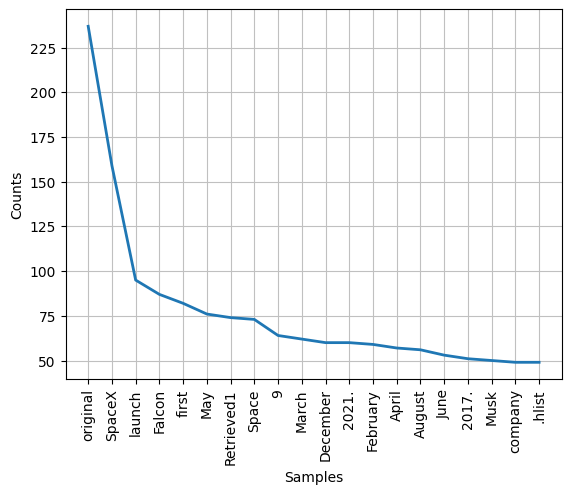

<Axes: xlabel='Samples', ylabel='Counts'>

In [121]:
freq.plot(20, cumulative=False)    #เพื่อดูแต่ละคำว่าปรากฎมากี่คำ

In [122]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Custom stop words

In [123]:
stopwords_default = stopwords.words('english')
print(len(stopwords_default))

179


In [124]:
# add a word
stopwords_default.append('like')
print(len(stopwords_default))

# add multiple words
stopwords_default.extend(['marvel', 'ghost'])
print(len(stopwords_default))

180
182


## Stemming

In [125]:
from nltk.stem import PorterStemmer   #มีหลายเจ้าที่ทำอั้นนี้มาให้เลือกใช้สอย
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# create an object of class PorterStemmer
ps = PorterStemmer()
ls = LancasterStemmer()

In [126]:
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [127]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

for w in words:
    print(w, " : ", ps.stem(w))

Programmers  :  programm
program  :  program
with  :  with
programming  :  program
languages  :  languag


In [129]:
words

['Programmers', 'program', 'with', 'programming', 'languages']

In [130]:
# proide a word to be stemmed
print("Porter Stemmer")
print(ps.stem("cats"))
print(ps.stem("trouble"))
print(ps.stem("troubling"))
print(ps.stem("troubled"))
print("Lancaster Stemmer")
print(ls.stem("cats"))
print(ls.stem("trouble"))
print(ls.stem("troubling"))
print(ls.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


In [131]:
# A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships", "stabil", "destabilize",
             "misunderstanding", "railroad", "moonlight", "football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,ps.stem(word),ls.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


In [132]:
sentence = "Pythoners are very intelligent and work very pythonly and \
now they are pythoning their way to success."
ps.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [133]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
        #print(stem_sentence)
    return "".join(stem_sentence)

print(stemSentence(sentence))

python are veri intellig and work veri pythonli and now they are python their way to success . 


## Lemmatization

In [134]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
sentence = "Programmers program with programming languages"
tokenization = nltk.word_tokenize(sentence)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wl.lemmatize(w)))

Lemma for Programmers is Programmers
Lemma for program is program
Lemma for with is with
Lemma for programming is programming
Lemma for languages is language


In [136]:
words = ["program", "programs", "programmer", "programming", "programmers"]
for w in words:
    print(w, " : ", wl.lemmatize(w))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  programming
programmers  :  programmer


In [137]:
sentence = "Pythoners are very intelligent and work very pythonly and \
now they are pythoning their way to success."
def lemmaSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wl.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

print(lemmaSentence(sentence))

Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success . 


In [138]:
for item in ['am' ,'are' ,'is','was','were']:
    print(wl.lemmatize(item),end='\t')

am	are	is	wa	were	

In [139]:
for item in ['am' ,'are' ,'is','was','were']:
    print(wl.lemmatize(item,pos='v'),end='\t')

be	be	be	be	be	

`pos='v'` means we set lemmatizer pos tag manually as verb(‘v’), otherwise it would have taken ’n’ → noun as default

We can automatically set pos tag of words using `nltk.pos_tag`

In [140]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [141]:
import nltk
nltk.download('averaged_perceptron_tagger')
for items in ['best', 'well','better']+['be', 'was','were', 'is', 'am']:
    print(f"{items:<6} --> {wl.lemmatize(items, pos=get_wordnet_pos(items)):<4}, tag="+get_wordnet_pos(items), end='\n')

best   --> best, tag=n
well   --> well, tag=r
better --> well, tag=r
be     --> be  , tag=v
was    --> be  , tag=v
were   --> be  , tag=v
is     --> be  , tag=v
am     --> be  , tag=v


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Comparing stemming and lemmatization \
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#

In [142]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [143]:
paragraph = """
    I have three visions for India. In 3000 years of our history,
    people from all over the world have come and invaded us, captured our lands,
    conquered our minds. From Alexander onwards, the Greeks, the Turks, the Moguls,
    the Portuguese, the British, the French, the Dutch, all of them came and looted us,
    took over what was ours. Yet we have not done this to any other nation.
    We have not conquered anyone. We have not grabbed their land, their culture,
    their history and tried to enforce our way of life on them.
    """

In [144]:
sentences = nltk.sent_tokenize(paragraph)
print(sentences)

print("\n\n Result after Stemming \n\n")
stemmer = nltk.PorterStemmer()
# Stemming
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
print(sentences)

sentences = nltk.sent_tokenize(paragraph)
print("\n\n Result after Lammatizing \n\n")
lemmatizer = WordNetLemmatizer()
# Lemmatization
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
print(sentences)

['\n    I have three visions for India.', 'In 3000 years of our history,\n    people from all over the world have come and invaded us, captured our lands,\n    conquered our minds.', 'From Alexander onwards, the Greeks, the Turks, the Moguls,\n    the Portuguese, the British, the French, the Dutch, all of them came and looted us,\n    took over what was ours.', 'Yet we have not done this to any other nation.', 'We have not conquered anyone.', 'We have not grabbed their land, their culture,\n    their history and tried to enforce our way of life on them.']


 Result after Stemming 


['i three vision india .', 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .', 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .', 'yet done nation .', 'we conquer anyon .', 'we grab land , cultur , histori tri enforc way life .']


 Result after Lammatizing 


['I three vision India .', 'In 3000 year history , people wo

# Text Similarity

In [145]:
doc_1 = "Data is the oil of the digital economy"
doc_2 = "Data is a new oil"

# Vector representation of the document
["data", "digital", "economy", "is", "new", "of", "oil", "the"]
doc_1_vector = [1, 1, 1, 1, 0, 1, 1, 2]
doc_2_vector = [1, 0, 0, 1, 1, 0, 1, 0]

![](https://studymachinelearning.com/wp-content/uploads/2019/09/cosine_similarity_example_1.png)

In [146]:
data = [doc_1, doc_2]

In [147]:
!pip install --upgrade pip
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


Using wordcount

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)
vector_matrix

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [149]:
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['data', 'digital', 'economy', 'is', 'new', 'of', 'oil', 'the'],
      dtype=object)

In [150]:
vector_matrix.toarray()

array([[1, 1, 1, 1, 0, 1, 1, 2],
       [1, 0, 0, 1, 1, 0, 1, 0]])

In [151]:
import pandas as pd

def create_dataframe(matrix, tokens):
    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [152]:
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,1,1,1,1,0,1,1,2
doc_2,1,0,0,1,1,0,1,0


In [153]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.474342
doc_2,0.474342,1.000000


Using TF-IDF

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names_out()
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
doc_2,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000


In [155]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.327871
doc_2,0.327871,1.000000


# Text Summarization
https://www.geeksforgeeks.org/python-text-summarizer/

In [156]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Input text - to summarize
text = """There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar."""

print(text)

There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar.


In [157]:
# Tokenizing the text
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

words

['There',
 'are',
 'many',
 'techniques',
 'available',
 'to',
 'generate',
 'extractive',
 'summarization',
 'to',
 'keep',
 'it',
 'simple',
 ',',
 'I',
 'will',
 'be',
 'using',
 'an',
 'unsupervised',
 'learning',
 'approach',
 'to',
 'find',
 'the',
 'sentences',
 'similarity',
 'and',
 'rank',
 'them',
 '.',
 'Summarization',
 'can',
 'be',
 'defined',
 'as',
 'a',
 'task',
 'of',
 'producing',
 'a',
 'concise',
 'and',
 'fluent',
 'summary',
 'while',
 'preserving',
 'key',
 'information',
 'and',
 'overall',
 'meaning',
 '.',
 'One',
 'benefit',
 'of',
 'this',
 'will',
 'be',
 ',',
 'you',
 'don',
 '’',
 't',
 'need',
 'to',
 'train',
 'and',
 'build',
 'a',
 'model',
 'prior',
 'start',
 'using',
 'it',
 'for',
 'your',
 'project',
 '.',
 'It',
 '’',
 's',
 'good',
 'to',
 'understand',
 'Cosine',
 'similarity',
 'to',
 'make',
 'the',
 'best',
 'use',
 'of',
 'the',
 'code',
 'you',
 'are',
 'going',
 'to',
 'see',
 '.',
 'Cosine',
 'similarity',
 'is',
 'a',
 'measure',
 'o

In [158]:
# Creating a frequency table to keep the
# score of each word
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
freqTable

{'many': 1,
 'techniques': 1,
 'available': 1,
 'generate': 1,
 'extractive': 1,
 'summarization': 2,
 'keep': 1,
 'simple': 1,
 ',': 2,
 'using': 2,
 'unsupervised': 1,
 'learning': 1,
 'approach': 1,
 'find': 1,
 'sentences': 2,
 'similarity': 4,
 'rank': 1,
 '.': 7,
 'defined': 1,
 'task': 1,
 'producing': 1,
 'concise': 1,
 'fluent': 1,
 'summary': 1,
 'preserving': 1,
 'key': 1,
 'information': 1,
 'overall': 1,
 'meaning': 1,
 'one': 1,
 'benefit': 1,
 '’': 2,
 'need': 1,
 'train': 1,
 'build': 1,
 'model': 1,
 'prior': 1,
 'start': 1,
 'project': 1,
 'good': 1,
 'understand': 1,
 'cosine': 4,
 'make': 1,
 'best': 1,
 'use': 1,
 'code': 1,
 'going': 1,
 'see': 1,
 'measure': 1,
 'two': 1,
 'non-zero': 1,
 'vectors': 2,
 'inner': 1,
 'product': 1,
 'space': 1,
 'measures': 2,
 'angle': 3,
 '0': 1,
 'similar': 1}

In [159]:
sentences = sent_tokenize(text)
sentences

['There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them.',
 'Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning.',
 'One benefit of this will be, you don’t need to train and build a model prior start using it for your project.',
 'It’s good to understand Cosine similarity to make the best use of the code you are going to see.',
 'Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.',
 'Its measures cosine of the angle between vectors.',
 'The angle will be 0 if sentences are similar.']

In [160]:
# Creating a dictionary to keep the score
# of each sentence
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq

sentenceValue

{'There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them.': 32,
 'Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning.': 20,
 'One benefit of this will be, you don’t need to train and build a model prior start using it for your project.': 22,
 'It’s good to understand Cosine similarity to make the best use of the code you are going to see.': 26,
 'Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.': 29,
 'Its measures cosine of the angle between vectors.': 19,
 'The angle will be 0 if sentences are similar.': 14}

In [161]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text
average = int(sumValues / len(sentenceValue))
average

23

In [162]:
# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

 There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
